In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import networkx as nx
import pandas as pd

In [6]:
M = nx.read_graphml('../data/processed/2015/migration_network.graphml')
len(M.nodes())

180

In [7]:
nx.adjacency_matrix(M)

<180x180 sparse matrix of type '<class 'numpy.float64'>'
	with 4996 stored elements in Compressed Sparse Row format>

In [4]:
36052/(190*190)

0.9986703601108033

In [5]:
A = nx.read_graphml('../data/processed/2011/A_country.graphml')
nx.adjacency_matrix(A)

<190x190 sparse matrix of type '<class 'numpy.float64'>'
	with 36052 stored elements in Compressed Sparse Row format>

In [8]:
len(set(A.nodes).intersection(M.nodes()))

180

In [44]:
len({'BRN', 'SMR', 'ARE', 'USR', 'ZMB', 'AND', 'TGO', 'LBY', 'PAK', 'BFA', 'BTN', 'ROW', 'SOM', 'GIN', 'AGO', 'BOL', 'CUB', 'LIE', 'NGA', 'MAR', 'AFG', 'SYR', 'MMR', 'QAT', 'BEN', 'NPL', 'TZA', 'VEN', 'BRB', 'BIH', 'PHL', 'PYF', 'SWZ', 'PRY', 'KHM', 'LBN', 'SLE', 'MAC', 'GEO', 'NAM', 'THA', 'LBR', 'BDI', 'RWA', 'TJK', 'OMN', 'LKA', 'PER', 'SDS', 'BMU', 'NCL', 'IRQ', 'LAO', 'MCO', 'MNG', 'MDA', 'BLR', 'PRK', 'URY', 'ARM', 'GMB', 'UGA', 'ZWE', 'BLZ', 'PAN', 'VGB', 'COG', 'PNG', 'ECU', 'LSO', 'NER', 'EGY', 'TUN', 'DZA', 'MLI', 'FJI', 'MNE', 'TKM', 'ETH', 'ATG', 'MDG', 'DJI', 'VNM', 'UZB', 'KWT', 'MRT', 'GRL', 'PSE', 'YEM', 'CMR', 'GTM', 'ANT', 'HTI', 'JOR', 'ALB', 'KGZ', 'AZE', 'DOM', 'MYS', 'NIC', 'WSM', 'IRN', 'SLV', 'ABW', 'MDV', 'JAM', 'CIV', 'SYC', 'KAZ', 'BWA', 'GUY', 'CPV', 'ERI', 'GAB', 'HKG', 'BHR', 'TTO', 'COD', 'MKD', 'MWI', 'MOZ', 'HND', 'MUS', 'VUT', 'SUR', 'STP', 'KEN', 'GHA', 'BGD', 'UKR', 'CAF', 'CYM', 'SRB', 'SEN', 'SUD', 'BHS', 'TCD', 'TWN'})

138

In [10]:
import pandas as pd
# Gross capital formation (current US$)
df_GFCF = pd.read_excel('../data/raw/API_NE.GDI.TOTL.CD_DS2_en_excel_v2_1742937.xls', skiprows=3)
df_GFCF.set_index('Country Code', inplace=True)
df_GFCF = df_GFCF[[str(s) for s in range(2000, 2019)]].stack().reset_index()
df_GFCF.columns = ['country', 'year', 'GFCF']

In [13]:
len(set(A.nodes).intersection(M.nodes()).intersection(df_GFCF.country.unique()))

166

In [1]:
from src.data.panel_data_etl import PanelDataETL

etl = PanelDataETL(input_filepath='../data/raw', output_filepath='../data/processed')
df_model = etl.run()
df_model.to_parquet(os.path.join('../data/processed', "panel_data.parquet"))


countries lost because of population missing:  {'CYM', 'ROW', 'LIE', 'MCO', 'VGB', 'ATG', 'GRL', 'ANT', 'AND', 'BMU', 'SYC', 'USR', 'SUD', 'TWN', 'ABW', 'SDS', 'SMR'}


In [6]:
import pandas as pd
import os

input_filepath='../data/raw'
output_filepath='../data/processed'
data_path = os.path.join(input_filepath, 'DP_LIVE_06072020184943320.csv')
df_working = pd.read_csv(data_path, dtype={'TIME':str})
df_working.rename(columns = {'LOCATION':'country','TIME':'year', 'Value':'pctg'}, inplace=True)
df_working = df_working[['country', 'year', 'pctg']]

countries with wp:  ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'BRA' 'CHL' 'COL' 'EST' 'ISR' 'RUS'
 'SVN' 'OECD' 'EU28' 'LVA' 'ARG' 'BGR' 'CHN' 'CRI' 'HRV' 'CYP' 'IND' 'IDN'
 'LTU' 'MLT' 'ROU' 'SAU' 'SGP' 'ZAF' 'WLD' 'G20']


<AxesSubplot:ylabel='Density'>

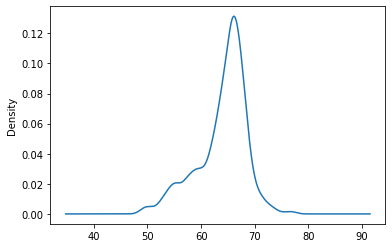

In [15]:
print('countries with wp: ', df_working.country.unique())
df_working.pctg.plot(kind='kde')

In [25]:
# Working population data from https://data.worldbank.org/indicator/SL.TLF.TOTL.IN
input_filepath='../data/raw'

data_path = os.path.join(input_filepath,'API_SL.TLF.TOTL.IN_DS2_en_csv_v2_1929128.csv')
df_population = pd.read_csv(data_path, skiprows=4)
df_population[df_population['Country Code']=='ESP']


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
68,Spain,ESP,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,23581654.0,23386629.0,23181003.0,23115401.0,23103511.0,23047059.0,23065037.0,23120097.0,23034337.0,NaN
